In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [2]:
# keras.datasets.mnist.load_data()  # -> data and test data


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
print("Training samples: ", len(X_train))
print("Test samples: ", len(X_test))

print("Shape of individual images: ", X_train[0].shape)

Training samples:  60000
Test samples:  10000
Shape of individual images:  (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

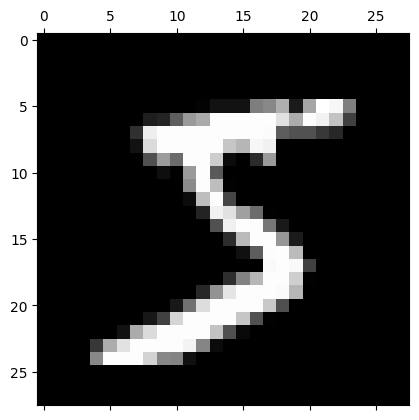

In [5]:
plt.matshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

np.uint8(5)

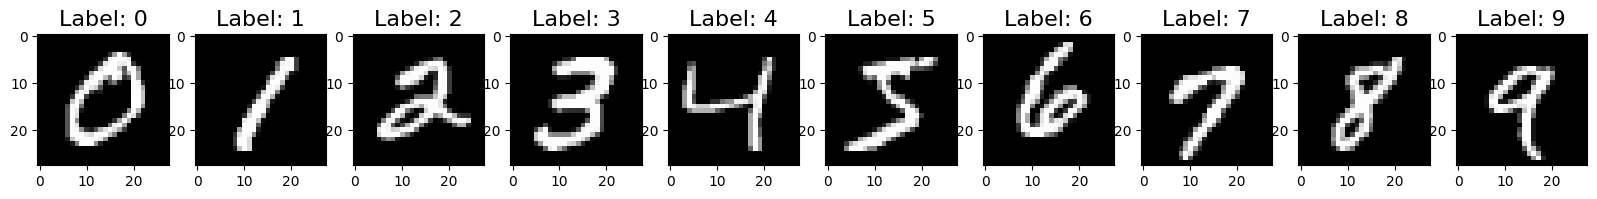

In [7]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [8]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the process since smaller values make the weight adjusments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
for r in X_train[2]:
    for c in r:
        if c > 0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural netwok can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons(28x28 pixels in each image) and the output layer will have 10 neurons as we want to predict a digit, 0-9

In [13]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation="softmax")
    ]
)

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

/opt/conda/envs/ml/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 12:30:49.533620: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.8097 - loss: 0.7313
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9135 - loss: 0.3150
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.9182 - loss: 0.2907
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.9222 - loss: 0.2784
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.9256 - loss: 0.2637
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.9290 - loss: 0.2558
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.9271 - loss: 0.2608
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.9302 - loss: 0.2540
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.9293 - loss: 0.2512
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.9313 - loss: 0.2485


In [14]:
y_predicted = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step


2025-08-18 12:31:09.431439: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


In [15]:
y_predicted[1]

array([1.4168807e-04, 1.3133969e-06, 9.9487919e-01, 2.9370900e-05,
       2.6192683e-15, 2.6699684e-03, 2.2550656e-03, 3.0635257e-19,
       2.3498491e-05, 7.0297392e-16], dtype=float32)

In [16]:
np.argmax(y_predicted[1])

np.int64(2)

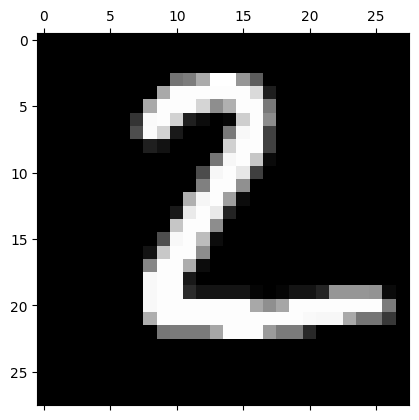

In [17]:
plt.matshow(X_test[1], cmap='gray')

In [18]:
y_test[1]

np.uint8(2)

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

Check against the first 10-labels

In [21]:
print(y_predicted_labels[:10])
print(', '.join([str(c) for c in y_test[:10]]))


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9)]
7, 2, 1, 0, 4, 1, 4, 9, 5, 9


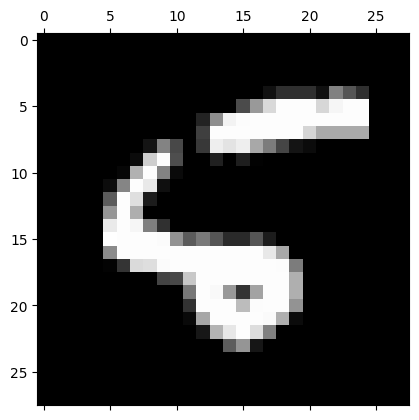

In [22]:
plt.matshow(X_test[8], cmap='gray')

Create a confusion matrix to see how well the model performed.

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [24]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    8,    6,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    8,  933,   16,    6,    5,   12,    8,   35,    4],
       [   2,    0,   19,  920,    1,   27,    2,    9,   24,    6],
       [   1,    1,    6,    2,  912,    0,   10,    4,   10,   36],
       [   7,    2,    2,   32,    8,  787,   14,    5,   31,    4],
       [  11,    3,    9,    1,    7,   14,  910,    1,    2,    0],
       [   1,    6,   25,    6,    7,    1,    0,  951,    4,   27],
       [   6,    9,    5,   20,    8,   26,    8,    9,  877,    6],
       [  10,    7,    1,    9,   23,    7,    0,   23,   13,  916]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

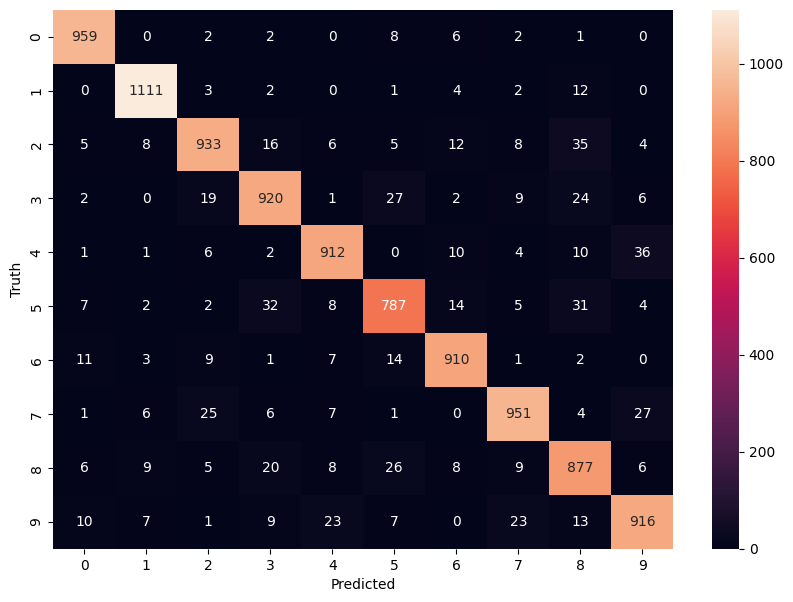

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [26]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [27]:
y_error_indexes = []
for i, error in enumerate(errors):
    if error:
        y_error_indexes.append(i)
len(y_error_indexes)

724

# Check a few random predictions

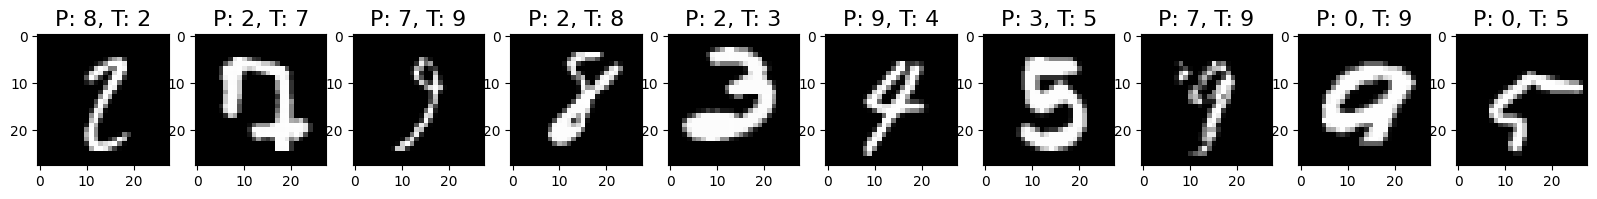

In [35]:
import random

idx_to_check = []
for _ in range(10):
    idx_to_check.append(y_error_indexes[random.randint(0, len(y_error_indexes)-1)])

num_classes = 10

_, ax = plt.subplots(1, num_classes, figsize=(20, 20)) # Create a figure and a set of subplots with 'num_classes' number of columns, each subplot size is 20x20
for i in range(len(idx_to_check)):
    idx = idx_to_check[i]
    sample = X_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P: {predicted_value}, T: {true_value}', fontsize=16)


Add a hidden layer to our model and see if it improves the accuracy.

In [29]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784,), activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

model2.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train_flattened, y_train, epochs=25)

/opt/conda/envs/ml/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 12:31:10.241371: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8865 - loss: 0.3969
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9673 - loss: 0.1113
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9797 - loss: 0.0673
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9859 - loss: 0.0471
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9897 - loss: 0.0346
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9917 - loss: 0.0258
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9929 - loss: 0.0214
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9948 - loss: 0.0160
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9961 - loss: 0.0128
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9970 - loss: 0.0097
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9968 - loss: 0.0093
Epoch 12/25
1875/1875 ━━━━━━━━

In [30]:
y_predicted2 = model2.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


In [ ]:
y_predicted_labels2 = []

for i in y_predicted2:
    y_predicted_labels2.append(np.argmax(i))

In [32]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)

Text(95.72222222222221, 0.5, 'Truth')

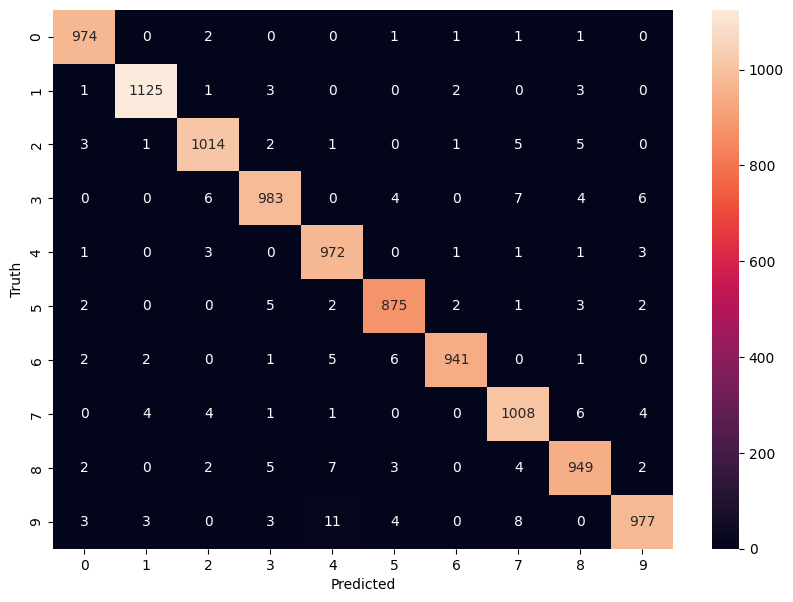

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
errors2 = (y_predicted_labels2 - y_test != 0)
y_error_indexes2 = [i for i, error in enumerate(errors2) if error]
len(y_error_indexes2)

182

Lab 2025-08-18
 
Model 3 Optimization
Today, we have an exciting lab ahead. Your task is to enhance our model by reducing the number of errors. Let's create a new version, Model 3, and experiment with various parameters.
 
Consider adjusting the number of **epochs**, exploring different **activation functions**, and modifying the **hidden layers**, among other options.
While we already have a good test score, don’t expect dramatic improvements, but aim to optimize the model further.
 
I also want you to watch the following video, where they go through **natural language processing** thoroughly. This will definitely give you an idea of what we are going to go through tomorrow and more.
 

/opt/conda/envs/ml/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - accuracy: 0.3969 - loss: 2.0103
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.8200 - loss: 0.6926
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.8728 - loss: 0.4556
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.8941 - loss: 0.3776
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9041 - loss: 0.3419
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.9078 - loss: 0.3262
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.9129 - loss: 0.2994
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.9197 - loss: 0.2789
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.9195 - loss: 0.2773
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.9239 - loss: 0.2643
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.9234 - loss: 0.2607
Epoch 12

Text(95.72222222222221, 0.5, 'Truth')

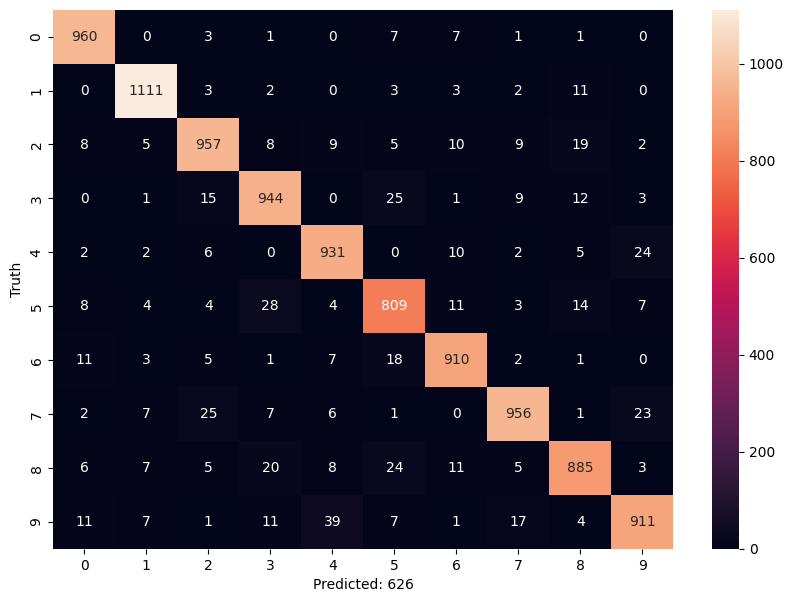

In [40]:
model3 = keras.Sequential(
    [
        keras.layers.Dense(50, input_shape=(784,), activation="sigmoid"),
        keras.layers.Dense(200, input_shape=(784,), activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

model3.compile(
    optimizer = 'SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.fit(X_train_flattened, y_train, epochs=15)

y_predicted3 = model3.predict(X_test_flattened)

y_predicted_labels3 = []

for i in y_predicted3:
    y_predicted_labels3.append(np.argmax(i))
    

cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3)

errors3 = (y_predicted_labels3 - y_test != 0)
y_error_indexes3 = [i for i, error in enumerate(errors3) if error]
len(y_error_indexes3)

plt.figure(figsize=(10, 7))
sns.heatmap(cm3, annot=True, fmt='d')
plt.xlabel(f'Predicted: {len(y_error_indexes3)}')
plt.ylabel('Truth')
